In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.filterwarnings("ignore")
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bdataset.csv')
print(df1.shape)

(13320, 9)


In [ ]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
df1.head()
df = pd.DataFrame(df1)

name = df['bath'].head(10)
price = df['price'].head(10)
fig = plt.figure(figsize =(5,3))
plt.bar(name[0:10], price[0:10])
plt.xlabel("No. of bathrooms")
plt.ylabel("Price")
plt.title("No of bathroom analysis" )
plt.show()

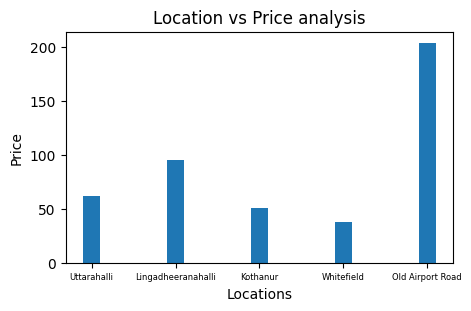

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
df1.head()
df = pd.DataFrame(df1)

name = df['location'].head(10)
price = df['price'].head(10)
fig = plt.figure(figsize =(5,3))

plt.bar(name[2:7], price[2:7],0.2)
plt.xticks(fontsize=6)
plt.xlabel("Locations")
plt.ylabel("Price")
plt.title("Location vs Price analysis" )
plt.show()

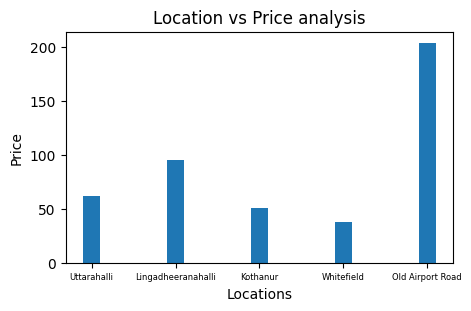

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
df1.head()
df = pd.DataFrame(df1)

name = df['location'].head(10)
price = df['price'].head(10)
fig = plt.figure(figsize =(5,3))

plt.bar(name[2:7], price[2:7],0.2)
plt.xticks(fontsize=6)
plt.xlabel("Locations")
plt.ylabel("Price")
plt.title("Location vs Price analysis" )
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df1.columns



Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df2 = df1.drop(["area_type","availability","society","balcony","availability"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2.shape

(13320, 5)

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3.shape

(13246, 5)

In [ ]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3["size"].nunique()

31

In [ ]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3.drop("size", axis=1, inplace=True)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):  # x contains string values only.
    try:
        float(x)  # Values of x which can be converted into float numbers.
    except:
        return False
    return True

# Returns the values which can be converted into float datatype only.
df3[df3["total_sqft"].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_range_to_num(x):
    numbers = x.split("-")
    if len(numbers)==2:
        return (float(numbers[0])+float(numbers[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_range_to_num)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df4.total_sqft.isnull().sum()

46

feature engineering

In [ ]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.location.nunique()

1304

In [ ]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())

In [ ]:
location_stats = df5["location"].value_counts(ascending = False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(location_stats)

1293

In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [ ]:
df5.location.nunique()

1293

In [ ]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5.location.nunique()

242

## Outlier Detection and Outlier Removal

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [ ]:
df5.shape

(13246, 6)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 6)

## Outlier Removal Using Standard Deviation and Mean

In [ ]:
df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_outliers(df):
    df_out = pd.DataFrame() # Blank dataframe
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft)>(m-std)) & ((subdf.price_per_sqft)<(m+std))]
        # Outlier detection and removal using mean and one standard deviation
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.shape

(10241, 6)

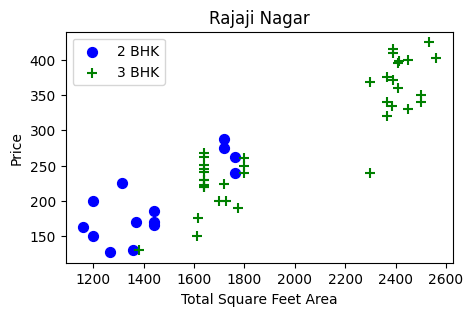

In [ ]:
def scatter_plot(df, location):
    bhk2 = df[(df["location"] == location) & (df.bhk==2)]
    bhk3 = df[(df["location"] == location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (5,3)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "green", label = "3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

scatter_plot(df7,"Rajaji Nagar")

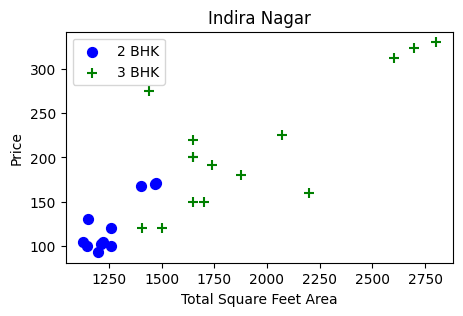

In [ ]:
scatter_plot(df7,"Indira Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df7.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

df8.shape

(7329, 6)

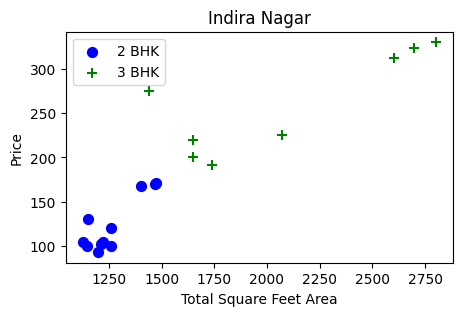

In [ ]:
scatter_plot(df8,"Indira Nagar")

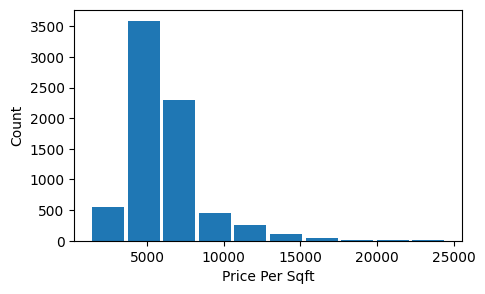

In [ ]:
plt.hist(df8.price_per_sqft, rwidth=0.9)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

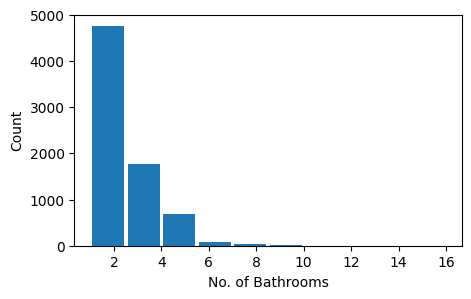

In [ ]:
plt.hist(df8.bath, rwidth = 0.90)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")
plt.show()

In [ ]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [ ]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 6)

In [ ]:
df10 = df9.drop("price_per_sqft", axis= 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
dummy_df = pd.get_dummies(df10.location)
dummy_df.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df = pd.concat([df10.drop("location", axis = 1), dummy_df.drop("1st Block Jayanagar", axis = 1)], axis = 1)
final_df.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MODEL

In [ ]:
final_df.shape

(7251, 245)

In [ ]:
X = final_df.drop("price", axis=1)
y = final_df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
from sklearn.metrics import  mean_absolute_error , mean_squared_error as MSE

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
(lr.score(X_test, y_test))



0.8452277697872461

In [ ]:
ds = DecisionTreeRegressor()
ds.fit(X_train, y_train)
(ds.score(X_test, y_test))


0.7758109029193728

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8406759978503793

In [ ]:
scorearr=[]
Trainingscorearr=[]
scorearr.append(lr.score(X_test, y_test))
scorearr.append(ds.score(X_test, y_test))
scorearr.append(rf.score(X_test, y_test))
Trainingscorearr.append(lr.score(X_train, y_train))
Trainingscorearr.append(ds.score(X_train, y_train))
Trainingscorearr.append(rf.score(X_train, y_train))
print(scorearr)
print(Trainingscorearr)

[0.8452277697872461, 0.7758109029193728, 0.8406759978503793]
[0.8541850010771193, 0.992282191777777, 0.9699134404657213]


In [ ]:
mean_abs_errors = []
mean_Sq_error = []
root_mean_Sq=[]
# print("LR= " ,lr.predict(X_test))
# print("DS= " ,ds.predict(X_test))
# print("RF= " ,rf.predict(X_test))
y_pred = lr.predict(X_test)
mean_abs_errors.append(mean_absolute_error(y_test, y_pred))
mean_Sq_error.append(MSE(y_test,y_pred))
root_mean_Sq.append(np.sqrt(MSE(y_test, y_pred)))

y_pred = ds.predict(X_test)
mean_abs_errors.append(mean_absolute_error(y_test, y_pred))
mean_Sq_error.append(MSE(y_test,y_pred))
root_mean_Sq.append(np.sqrt(MSE(y_test, y_pred)))

y_pred = rf.predict(X_test)
mean_abs_errors.append(mean_absolute_error(y_test, y_pred))
mean_Sq_error.append(MSE(y_test,y_pred))
root_mean_Sq.append(np.sqrt(MSE(y_test, y_pred)))

print("Root mean square  = ",root_mean_Sq)
print("Mean abs square  = ",mean_abs_errors)

Root mean square  =  [27.986889672236725, 33.683356308000995, 28.395447607056926]
Mean abs square  =  [16.594897994151765, 16.523441122363753, 14.249908072393255]


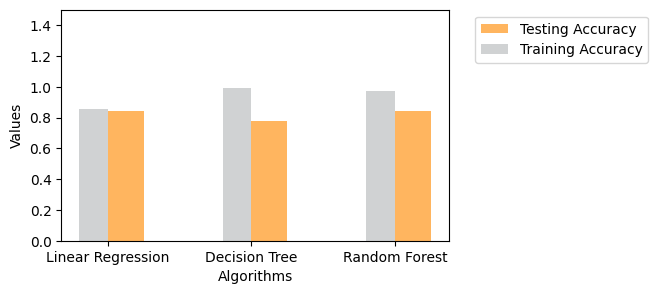

In [ ]:
import numpy as np
X=['Linear Regression','Decision Tree','Random Forest']
#accuracy = performance_df['Accuracy']
##precision = performance_df['Precision']
#recall = performance_df['Recall']
#f1score = performance_df['F1-Score']


X_axis = np.arange(len(X))
plt.bar(X_axis + 0.1, scorearr, 0.3, label = 'Testing Accuracy',color='#FFB55F')
plt.bar(X_axis - 0.1, Trainingscorearr, 0.2, label = 'Training Accuracy',color='#D0D2D3')
# plt.bar(X_axis + 0.1, mean_Sq_error, 0.2, label = 'Mean Squared Error')
# plt.bar(X_axis - 0.1, scorearr, 0.2, label = 'Precision')
plt.xticks(X_axis, X)
plt.ylim(0, 1.5)
plt.xlabel("Algorithms")
plt.ylabel("Values")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
import numpy as np
X=['Linear Regression','Decision Tree','Random Forest']
plt.bar["figure.autolayout"] = True
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, mean_abs_errors, 0.2, label = 'Mean Absolute Error',color='#15607a')
plt.bar(X_axis + 0.1, root_mean_Sq, 0.2, label = 'Root Mean Square',color='#65E0BA')
plt.xticks(X_axis, X)
plt.xlabel("Algorithm")
plt.ylabel("Value")
plt.title("Payal have gone mad")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

TypeError: ignored